In [2]:
!pip install koreanize-matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import numpy as np
import pandas as pd

path = '../data/연간자료(지출, 2019~) - 전체가구_1인이상/2019_연간자료(지출, 2019~) - 전체가구_1인이상_20240426_97622.csv'
data = pd.read_csv(path, encoding='cp949')

df = pd.DataFrame(data)
df.head(2)


C:\Users\rladn\AppData\Local\Temp\ipykernel_16340\2755222672.py:5: DtypeWarning: Columns (72) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, encoding='cp949')


,조사연월,가구일련번호,가구구분코드,가구원수,취업인원수,노인가구여부,모자가구여부,맞벌이가구여부,일반가구여부,세대구분코드,...,가계지출_소비지출_기타상품서비스_기타서비스금액구입비,가계지출_비소비지출금액,가계지출_비소비지출_경상조세,가계지출_비소비지출_비경상조세,가계지출_비소비지출_연금기여금,가계지출_비소비지출_사회보장구입비,가계지출_비소비지출_이자비용,가계지출_비소비지출_가구간이전지출금액,가계지출_비소비지출_비영리단체이전지출금액,도시읍면부구분코드
0,201900,1,2,1,0,0,0,0,1,1,...,0,99416,0,15190,0,0,4893,50000,29333,1
1,201900,2,1,3,2,0,0,0,1,2,...,3333,316357,37697,0,0,110160,0,142500,26000,1


In [4]:
#열 변수 변경

df.rename(columns={
    '가계지출금액': '전체소비지출',
    '가계지출_소비지출금액': '소비지출',
    '가계지출_소비지출_식료품비주류음료구입비': '식료품음료구입',
    '가계지출_소비지출_식료품비주류음료_곡물구입비': '식료품_곡물구입',
    '가계지출_소비지출_식료품비주류음료_곡물가공품구입비': '식료품_곡물가공품구입',
    '가계지출_소비지출_식료품비주류음료_빵떡류구입비': '식료품_빵떡류구입',
    '가계지출_소비지출_식료품비주류음료_육류구입비': '식료품_육류구입',
    '가계지출_소비지출_식료품비주류음료_육류가공품구입비': '식료품_육류가공품구입',
    '가계지출_소비지출_식료품비주류음료_신선수산동물구입비': '식료품_신선수산동물구입',
    '가계지출_소비지출_식료품비주류음료_염건수산동물구입비': '식료품_염건수산동물구입',
    '가계지출_소비지출_식료품비주류음료_기타수산동물가공구입비': '식료품_기타수산동물가공구입',
    '가계지출_소비지출_식료품비주류음료_유제품및알구입비': '식료품_유제품알구입',
    '가계지출_소비지출_식료품비주류음료_유지류구입비': '식료품_유지류구입',
    '가계지출_소비지출_식료품비주류음료_과일가공품구입비': '식료품_과일가공품구입',
    '가계지출_소비지출_식료품비주류음료_채소가공품구입비': '식료품_채소가공품구입',
    '가계지출_소비지출_식료품비주류음료_해조가공품구입비': '식료품_해조가공품구입',
    '가계지출_소비지출_식료품비주류음료_당류과자류구입비': '식료품_당류과자류구입',
    '가계지출_소비지출_식료품비주류음료_조미식품구입비': '식료품_조미식품구입',
    '가계지출_소비지출_식료품비주류음료_기타식품구입비': '식료품_기타식품구입',
    '가계지출_소비지출_식료품비주류음료_커피차구입비': '식료품_커피차구입',
    '가계지출_소비지출_식료품비주류음료_쥬스기타음료구입비': '식료품_쥬스음료구입',

    '가계지출_소비지출_주류담배구입비': '주류담배구입',
    '가계지출_소비지출_주류담배_주류구입비': '주류구입',
    '가계지출_소비지출_주류담배_담배구입비': '담배구입',

    '가계지출_소비지출_의류신발구입비': '의류신발구입',
    '가계지출_소비지출_의류신발_직물및외의구입비': '의류신발_직물및외의구입',
    '가계지출_소비지출_의류신발_내의구입비': '의류신발_내의구입',
    '가계지출_소비지출_의류신발_기타의복구입비': '의류신발_기타의복구입',
    '가계지출_소비지출_의류신발_의복관련서비스구입비': '의류신발_의복관련서비스구입',
    '가계지출_소비지출_의류신발_신발구입비': '의류신발_신발구입',
    '가계지출_소비지출_의류신발_신발서비스구입비': '의류신발_신발서비스구입',

    '가계지출_소비지출_주거수도광열비': '주거수도광열비',
    '가계지출_소비지출_주거수도광열_실제주거비구입비': '주거수도광열_실제주거비구입',
    '가계지출_소비지출_주거수도광열_주택유지수선구입비': '주거수도광열_주택유지수선구입',
    '가계지출_소비지출_주거수도광열_상하수도폐기물처리비': '주거수도광열_상하수도폐기물처리',
    '가계지출_소비지출_주거수도광열_기타주거관련서비스구입비': '주거수도광열_기타주거관련서비스구입',
    '가계지출_소비지출_주거수도광열_연료비구입비': '주거수도광열_연료비구입',

    '가계지출_소비지출_가정용품가사서비스이용금액': '가정용품가사서비스이용',
    '가계지출_소비지출_가정용품가사서비스_가구조명구입비': '가정용품가사서비스_가구조명구입',
    '가계지출_소비지출_가정용품가사서비스_실내장식구입비': '가정용품가사서비스_실내장식구입',
    '가계지출_소비지출_가정용품가사서비스_가구조명장식서비스이용금액': '가정용품가사서비스_가구조명장식서비스이용',
    '가계지출_소비지출_가정용품가사서비스_가정용섬유구입비': '가정용품가사서비스_가정용섬유구입',
    '가계지출_소비지출_가정용품가사서비스_가전가정용기기구입비': '가정용품가사서비스_가전가정용기기구입',
    '가계지출_소비지출_가정용품가사서비스_가전관련서비스이용금액': '가정용품가사서비스_가전관련서비스이용',
    '가계지출_소비지출_가정용품가사서비스_가사용품구입비': '가정용품가사서비스_가사용품구입',
    '가계지출_소비지출_가정용품가사서비스_가정용공구기타구입비': '가정용품가사서비스_가정용공구기타구입',
    '가계지출_소비지출_가정용품가사서비스_가사소모품구입비': '가정용품가사서비스_가사소모품구입',
    '가계지출_소비지출_가정용품가사서비스_가사서비스금액': '가정용품가사서비스_가사서비스',

    '가계지출_소비지출_보건제품구입비': '보건제품구입',
    '가계지출_소비지출_보건_의약품구입비': '보건_의약품구입',
    '가계지출_소비지출_보건_의료용소모품구입비': '보건_의료용소모품구입',
    '가계지출_소비지출_보건_보건의료용품기구구입비': '보건_보건의료용품기구구입',
    '가계지출_소비지출_보건_외래의료서비스이용금액': '보건_외래의료서비스이용',
    '가계지출_소비지출_보건_치과서비스이용금액': '보건_치과서비스이용',
    '가계지출_소비지출_보건_기타의료서비스이용금액': '보건_기타의료서비스이용',
    '가계지출_소비지출_보건_입원서비스이용금액': '보건_입원서비스이용',

    '가계지출_소비지출_교통비': '교통비',
    '가계지출_소비지출_교통_자동차구입비': '교통_자동차구입',
    '가계지출_소비지출_교통_기타운송기구구입비': '교통_기타운송기구구입',
    '가계지출_소비지출_교통_운송기구유지수리비': '교통_운송기구유지수리',
    '가계지출_소비지출_교통_운송기구연료비': '교통_운송기구연료',
    '가계지출_소비지출_교통_기타개인교통서비스이용금액': '교통_기타개인교통서비스이용',
    '가계지출_소비지출_교통_철도운송금액': '교통_철도운송',
    '가계지출_소비지출_교통_육상운송금액': '교통_육상운송',
    '가계지출_소비지출_교통_기타운송금액': '교통_기타운송',
    '가계지출_소비지출_교통_기타교통관련서비스이용금액': '교통_기타교통관련서비스이용',

    '가계지출_소비지출_통신비': '통신비',
    '가계지출_소비지출_통신_우편서비스이용금액': '통신_우편서비스이용',
    '가계지출_소비지출_통신_통신장비구입비': '통신_통신장비구입',
    '가계지출_소비지출_통신_통신서비스이용금액': '통신_통신서비스이용',

    '가계지출_소비지출_오락문화비': '오락문화비',
    '가계지출_소비지출_오락문화_영상음향기기구입비': '오락문화_영상음향기기구입',
    '가계지출_소비지출_오락문화_사진광학장비구입비': '오락문화_사진광학장비구입',
    '가계지출_소비지출_오락문화_정보처리장치구입비': '오락문화_정보처리장치구입',
    '가계지출_소비지출_오락문화_기록매체구입비': '오락문화_기록매체구입',
    '가계지출_소비지출_오락문화_영상음향정보기기수리비': '오락문화_영상음향정보기기수리',
    '가계지출_소비지출_오락문화_내구재구입비': '오락문화_내구재구입',
    '가계지출_소비지출_오락문화_악기기구구입비': '오락문화_악기기구구입',
    '가계지출_소비지출_오락문화_오락문화내구재유지수리비': '오락문화_오락문화내구재유지수리',
    '가계지출_소비지출_오락문화_장난감취미용품구입비': '오락문화_장난감취미용품구입',
    '가계지출_소비지출_오락문화_캠핑운동관련용품구입비': '오락문화_캠핑운동관련용품구입',
    '가계지출_소비지출_오락문화_화훼관련용품구입비': '오락문화_화훼관련용품구입',
    '가계지출_소비지출_오락문화_애완동물관련물품구입비': '애완동물_물품구입',
    '가계지출_소비지출_오락문화_화훼애완동물서비스이용금액': '애완동물_서비스이용',
    '가계지출_소비지출_오락문화_운동오락서비스이용금액': '운동오락_서비스이용',
    '가계지출_소비지출_오락문화_문화서비스이용금액': '문화_서비스이용',
    '가계지출_소비지출_오락문화_복권구입비': '복권_구입비',
    '가계지출_소비지출_오락문화_서적구입비': '서적_구입비',
    '가계지출_소비지출_오락문화_기타인쇄물구입비': '인쇄물_구입비',
    '가계지출_소비지출_오락문화_문구구입비': '문구_구입비',
    '가계지출_소비지출_오락문화_단체여행경비': '단체여행_경비'

},inplace=True)

In [5]:
df.rename(columns={
    '가계지출_소비지출_교육비': '교육비',
    '가계지출_소비지출_교육_정규교육비': '정규교육비',
    '가계지출_소비지출_교육_초등교육비': '초등교육비',
    '가계지출_소비지출_교육_중등교육비': '중등교육비',
    '가계지출_소비지출_교육_고등교육비': '고등교육비',
    '가계지출_소비지출_교육_학원보습교육비': '학원보습교육비',
    '가계지출_소비지출_교육_학생학원교육비': '학생학원교육비',
    '가계지출_소비지출_교육_성인학원비': '성인학원비',
    '가계지출_소비지출_교육_기타교육비': '기타교육비',

    '가계지출_소비지출_음식숙박비': '음식숙박비',
    '가계지출_소비지출_음식숙박_식대': '식대',
    '가계지출_소비지출_음식숙박_숙박비': '숙박비',

    '가계지출_소비지출_기타상품서비스이용금액' : '기타상품서비스이용',
    '가계지출_소비지출_기타상품서비스_이미용서비스이용금액': '이미용서비스이용',
    '가계지출_소비지출_기타상품서비스_이미용기기구입비': '이미용기기구입',
    '가계지출_소비지출_기타상품서비스_위생이미용용품구입비': '위생이미용용품구입',
    '가계지출_소비지출_기타상품서비스_시계장신구구입비': '시계장신구구입',
    '가계지출_소비지출_기타상품서비스_기타개인용품구입비': '기타개인용품구입',
    '가계지출_소비지출_기타상품서비스_복지시설비용금액': '복지시설비용',
    '가계지출_소비지출_기타상품서비스_보험료': '보험료',
    '가계지출_소비지출_기타상품서비스_기타금융구입비': '기타금융구입',
    '가계지출_소비지출_기타상품서비스_기타서비스금액구입비' : '기타서비스금액구입',


    '가계지출_비소비지출금액': '비소비지출금액',
    '가계지출_비소비지출_경상조세': '경상조세',
    '가계지출_비소비지출_비경상조세': '비경상조세',
    '가계지출_비소비지출_연금기여금': '연금기여금',
    '가계지출_비소비지출_사회보장구입비': '사회보장구입비',
    '가계지출_비소비지출_이자비용': '이자비용',
    '가계지출_비소비지출_가구간이전지출금액': '가구간이전지출금액',
    '가계지출_비소비지출_비영리단체이전지출금액': '비영리단체이전지출금액'
},inplace=True)
# 행 전처리

data = df[['조사연월', '가구일련번호', '가구구분코드', '가구원수', '취업인원수', '노인가구여부', '배우자코드', '가구주_성별코드', '가구주_연령', '가구주_취업여부', '거처구분코드', '자동차보유대수',
           '입주형태코드', '월세평가금액', '전세보증금', '소득구간코드', '전체소비지출', '소비지출', '식료품음료구입', '식료품_곡물구입', '식료품_곡물가공품구입', '식료품_빵떡류구입', '식료품_육류구입',
           '식료품_육류가공품구입', '식료품_신선수산동물구입', '식료품_염건수산동물구입', '식료품_기타수산동물가공구입', '식료품_유제품알구입', '식료품_유지류구입', '식료품_과일가공품구입',
           '식료품_채소가공품구입', '식료품_해조가공품구입', '식료품_당류과자류구입', '식료품_조미식품구입', '식료품_기타식품구입', '식료품_커피차구입', '식료품_쥬스음료구입', '주류담배구입',
           '주류구입', '담배구입', '의류신발구입', '의류신발_직물및외의구입', '의류신발_내의구입', '의류신발_기타의복구입', '의류신발_의복관련서비스구입', '의류신발_신발구입', '의류신발_신발서비스구입',
           '주거수도광열비', '주거수도광열_실제주거비구입', '주거수도광열_주택유지수선구입', '주거수도광열_상하수도폐기물처리', '주거수도광열_기타주거관련서비스구입', '주거수도광열_연료비구입',
           '가정용품가사서비스이용', '가정용품가사서비스_가구조명구입', '가정용품가사서비스_실내장식구입', '가정용품가사서비스_가구조명장식서비스이용', '가정용품가사서비스_가정용섬유구입',
           '가정용품가사서비스_가전가정용기기구입', '가정용품가사서비스_가전관련서비스이용', '가정용품가사서비스_가사용품구입', '가정용품가사서비스_가정용공구기타구입', '가정용품가사서비스_가사소모품구입',
           '가정용품가사서비스_가사서비스', '보건제품구입', '보건_의약품구입', '보건_의료용소모품구입', '보건_보건의료용품기구구입', '보건_외래의료서비스이용', '보건_치과서비스이용', '보건_기타의료서비스이용',
           '보건_입원서비스이용', '교통비', '교통_자동차구입', '교통_기타운송기구구입', '교통_운송기구유지수리', '교통_운송기구연료', '교통_기타개인교통서비스이용', '교통_철도운송', '교통_육상운송',
           '교통_기타운송', '교통_기타교통관련서비스이용', '통신비', '통신_우편서비스이용', '통신_통신장비구입', '통신_통신서비스이용', '오락문화비', '오락문화_영상음향기기구입', '오락문화_사진광학장비구입',
           '오락문화_정보처리장치구입', '오락문화_기록매체구입', '오락문화_영상음향정보기기수리', '오락문화_내구재구입', '오락문화_악기기구구입', '오락문화_오락문화내구재유지수리', '오락문화_장난감취미용품구입',
           '오락문화_캠핑운동관련용품구입', '오락문화_화훼관련용품구입', '애완동물_물품구입', '애완동물_서비스이용', '운동오락_서비스이용', '문화_서비스이용', '복권_구입비', '서적_구입비', '인쇄물_구입비',
           '문구_구입비', '단체여행_경비', '교육비', '정규교육비', '초등교육비', '중등교육비', '고등교육비', '학원보습교육비', '학생학원교육비', '성인학원비', '기타교육비', '음식숙박비', '식대', '숙박비',
           '기타상품서비스이용', '이미용서비스이용', '이미용기기구입', '위생이미용용품구입', '시계장신구구입', '기타개인용품구입', '복지시설비용', '보험료', '기타금융구입', '기타서비스금액구입', '비소비지출금액',
           '비경상조세', '비경상조세', '연금기여금', '사회보장구입비', '이자비용', '가구간이전지출금액', '비영리단체이전지출금액', '도시읍면부구분코드']]


In [6]:
# 행 전처리

data = df[['조사연월', '가구일련번호', '가구구분코드', '가구원수', '취업인원수', '노인가구여부', '배우자코드', '가구주_성별코드', '가구주_연령', '가구주_취업여부', '거처구분코드', '자동차보유대수',
           '입주형태코드', '월세평가금액', '전세보증금', '소득구간코드', '전체소비지출', '소비지출', '식료품음료구입', '식료품_곡물구입', '식료품_곡물가공품구입', '식료품_빵떡류구입', '식료품_육류구입',
           '식료품_육류가공품구입', '식료품_신선수산동물구입', '식료품_염건수산동물구입', '식료품_기타수산동물가공구입', '식료품_유제품알구입', '식료품_유지류구입', '식료품_과일가공품구입',
           '식료품_채소가공품구입', '식료품_해조가공품구입', '식료품_당류과자류구입', '식료품_조미식품구입', '식료품_기타식품구입', '식료품_커피차구입', '식료품_쥬스음료구입', '주류담배구입',
           '주류구입', '담배구입', '의류신발구입', '의류신발_직물및외의구입', '의류신발_내의구입', '의류신발_기타의복구입', '의류신발_의복관련서비스구입', '의류신발_신발구입', '의류신발_신발서비스구입',
           '주거수도광열비', '주거수도광열_실제주거비구입', '주거수도광열_주택유지수선구입', '주거수도광열_상하수도폐기물처리', '주거수도광열_기타주거관련서비스구입', '주거수도광열_연료비구입',
           '가정용품가사서비스이용', '가정용품가사서비스_가구조명구입', '가정용품가사서비스_실내장식구입', '가정용품가사서비스_가구조명장식서비스이용', '가정용품가사서비스_가정용섬유구입',
           '가정용품가사서비스_가전가정용기기구입', '가정용품가사서비스_가전관련서비스이용', '가정용품가사서비스_가사용품구입', '가정용품가사서비스_가정용공구기타구입', '가정용품가사서비스_가사소모품구입',
           '가정용품가사서비스_가사서비스', '보건제품구입', '보건_의약품구입', '보건_의료용소모품구입', '보건_보건의료용품기구구입', '보건_외래의료서비스이용', '보건_치과서비스이용', '보건_기타의료서비스이용',
           '보건_입원서비스이용', '교통비', '교통_자동차구입', '교통_기타운송기구구입', '교통_운송기구유지수리', '교통_운송기구연료', '교통_기타개인교통서비스이용', '교통_철도운송', '교통_육상운송',
           '교통_기타운송', '교통_기타교통관련서비스이용', '통신비', '통신_우편서비스이용', '통신_통신장비구입', '통신_통신서비스이용', '오락문화비', '오락문화_영상음향기기구입', '오락문화_사진광학장비구입',
           '오락문화_정보처리장치구입', '오락문화_기록매체구입', '오락문화_영상음향정보기기수리', '오락문화_내구재구입', '오락문화_악기기구구입', '오락문화_오락문화내구재유지수리', '오락문화_장난감취미용품구입',
           '오락문화_캠핑운동관련용품구입', '오락문화_화훼관련용품구입', '애완동물_물품구입', '애완동물_서비스이용', '운동오락_서비스이용', '문화_서비스이용', '복권_구입비', '서적_구입비', '인쇄물_구입비',
           '문구_구입비', '단체여행_경비', '교육비', '정규교육비', '초등교육비', '중등교육비', '고등교육비', '학원보습교육비', '학생학원교육비', '성인학원비', '기타교육비', '음식숙박비', '식대', '숙박비',
           '기타상품서비스이용', '이미용서비스이용', '이미용기기구입', '위생이미용용품구입', '시계장신구구입', '기타개인용품구입', '복지시설비용', '보험료', '기타금융구입', '기타서비스금액구입', '비소비지출금액',
           '비경상조세', '비경상조세', '연금기여금', '사회보장구입비', '이자비용', '가구간이전지출금액', '비영리단체이전지출금액', '도시읍면부구분코드']]


In [7]:
#성별 값 전처리
df['가구주_성별코드'] = df['가구주_성별코드'].replace({1:'남성', 2:'여성'})
gender = df['가구주_성별코드']
pd.DataFrame(gender)

,가구주_성별코드
0,여성
1,남성
2,남성
3,남성
4,여성
...,...
9505,남성
9506,남성
9507,남성
9508,남성


In [8]:
#배우자코드 값변경 1,2,3 --> 있음,있음(비동거), 없음
df['배우자코드'] = df['배우자코드'].replace({1: '있음(동거)', 2 : '있음(비동거)', 3: '없음'})

#가구구분코드 1,2 --> 근로자가구, 근로자외 가구
df['가구구분코드'] = df['가구구분코드'].replace({1: '근로자가구', 2 : '근로자외가구'})

#노인가구여부 0,1 --> 아님. 해당
df['노인가구여부'] = df['노인가구여부'].replace({0: '아님', 1 : '해당'})

#가구주_취업여부 (1:'취업', 2:'비취업')
df['가구주_취업여부'] = df['가구주_취업여부'].replace({1:'취업', 2:'비취업'})

#거처구분코드 :
#(1:'단독주택(다가구주택 포함)',2:'아파트',3:'연립주택',4:'다세대주택',5:'비거주용건물',6:'오피스텔',7:'기타')
df['거처구분코드'] = df['거처구분코드'].replace({1:'단독주택(다가구주택 포함)',2:'아파트',3:'연립주택',4:'다세대주택',5:'비거주용건물',6:'오피스텔',7:'기타'})

#입주형태코드 (1:'자기집',2:'무상주택',3:'사택',4:'전세',5:'영구임대',6:'보증부월세',7:'보증금 없는 월세')
df['입주형태코드'] = df['입주형태코드'].replace({1:'자기집',2:'무상주택',3:'사택',4:'전세',5:'영구임대',6:'보증부월세',7:'보증금 없는 월세'})

#소득구간코드 :
#(1:'100만원 미만', 2:'100~200만원 미만',3:'200~300만원 미만',4:'300~400만원 미만',5:'400~500만원 미만',6:'500~600만원 미만',7:'600~700만원 미만',8:'700만원 이상')
df['소득구간코드'] = df['소득구간코드'].replace({1:'100만원 미만', 2:'100~200만원 미만',3:'200~300만원 미만',4:'300~400만원 미만',5:'400~500만원 미만',6:'500~600만원 미만',7:'600~700만원 미만',8:'700만원 이상'})


In [9]:
age_10 = df[(df["가구주_연령"] >= 10) & (df["가구주_연령"] < 20)]["가구주_연령"]

df.drop(age_10, axis=0, inplace=True)

In [10]:
def age(가구주_연령):
    if 가구주_연령 < 20:
        return None  # 10대는 None으로 처리하여 제외
    elif 20 <= 가구주_연령 < 30:
        return '20대'
    elif 30 <= 가구주_연령 < 40:
        return '30대'
    elif 40 <= 가구주_연령 < 50:
        return '40대'
    elif 50 <= 가구주_연령 < 60:
        return '50대'
    elif 60 <= 가구주_연령 < 70:
        return '60대'
    else:
        return '70대 이상'

# 데이터 연령대별 구분
data.loc[:, '연령대'] = data['가구주_연령'].apply(age)
data = data.dropna()  # None 값을 가진 행 제외
data.연령대


C:\Users\rladn\AppData\Local\Temp\ipykernel_16340\165473212.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, '연령대'] = data['가구주_연령'].apply(age)


0          60대
1          60대
2          50대
3          20대
4          50대
         ...  
9505       30대
9506       50대
9507       60대
9508       60대
9509    70대 이상
Name: 연령대, Length: 9492, dtype: object

In [11]:
df = df[["소비지출","가구주_연령",'식료품음료구입','주류담배구입',
        '의류신발구입','주거수도광열비','교육비','음식숙박비','가정용품가사서비스이용',
        '보건제품구입','교통비','통신비','오락문화비', '기타상품서비스이용']]
df.head(2)

,소비지출,가구주_연령,식료품음료구입,주류담배구입,의류신발구입,주거수도광열비,교육비,음식숙박비,가정용품가사서비스이용,보건제품구입,교통비,통신비,오락문화비,기타상품서비스이용
0,451464,64,153011,1142,21833,79220,0,40642,8013,16733,31550,36850,4818,57652
1,1468101,63,300713,800,45300,302318,17200,152167,26840,139575,123183,89476,46501,224028


In [12]:
#df.cov()

In [13]:
df.corr(method='pearson')

,소비지출,가구주_연령,식료품음료구입,주류담배구입,의류신발구입,주거수도광열비,교육비,음식숙박비,가정용품가사서비스이용,보건제품구입,교통비,통신비,오락문화비,기타상품서비스이용
소비지출,1.000000,-0.282535,0.458652,0.123840,0.512130,0.334693,0.464818,0.597972,0.400251,0.326201,0.645797,0.370011,0.474484,0.484621
가구주_연령,-0.282535,1.000000,0.024405,-0.148868,-0.251223,-0.133656,-0.233614,-0.432706,-0.068129,0.067887,-0.100314,-0.261749,-0.155865,-0.147681
식료품음료구입,0.458652,0.024405,1.000000,0.044819,0.327894,0.066777,0.274726,0.306799,0.152379,0.201251,0.089914,0.219723,0.192581,0.239160
주류담배구입,0.123840,-0.148868,0.044819,1.000000,0.044498,0.046339,0.010439,0.214949,0.019062,-0.003103,0.038307,0.111242,0.034969,0.040666
의류신발구입,0.512130,-0.251223,0.327894,0.044498,1.000000,0.114390,0.259924,0.457323,0.167999,0.116481,0.120978,0.267876,0.274454,0.314355
주거수도광열비,0.334693,-0.133656,0.066777,0.046339,0.114390,1.000000,0.083555,0.149157,0.199794,0.030829,0.066360,0.097236,0.085815,0.106545
교육비,0.464818,-0.233614,0.274726,0.010439,0.259924,0.083555,1.000000,0.369413,0.067709,0.047254,0.074363,0.235736,0.203200,0.144747
음식숙박비,0.597972,-0.432706,0.306799,0.214949,0.457323,0.149157,0.369413,1.000000,0.159604,0.090959,0.163513,0.354607,0.330070,0.302622
가정용품가사서비스이용,0.400251,-0.068129,0.152379,0.019062,0.167999,0.199794,0.067709,0.159604,1.000000,0.109444,0.060238,0.113126,0.180473,0.193780
보건제품구입,0.326201,0.067887,0.201251,-0.003103,0.116481,0.030829,0.047254,0.090959,0.109444,1.000000,0.051887,0.058067,0.066689,0.113345


In [14]:
%matplotlib inline
import koreanize_matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# data.corr(method='pearson')
# ValueError: could not convert string to float: '60대'

# vscode에서 아래 방법으로 실행되서 이렇게 진행함.
data = pd.get_dummies(data)
data.corr()

,조사연월,가구일련번호,가구구분코드,가구원수,취업인원수,노인가구여부,배우자코드,가구주_성별코드,가구주_연령,가구주_취업여부,...,이자비용,가구간이전지출금액,비영리단체이전지출금액,도시읍면부구분코드,연령대_20대,연령대_30대,연령대_40대,연령대_50대,연령대_60대,연령대_70대 이상
조사연월,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
가구일련번호,NaN,1.000000,0.091764,-0.023235,0.018045,0.090443,-0.040616,-0.011987,0.128284,-0.017275,...,-0.088310,0.038372,-0.000718,-0.436613,-0.082044,-0.035247,-0.042577,0.002321,0.024283,0.089267
가구구분코드,NaN,0.091764,1.000000,-0.161390,-0.303369,0.316710,0.038750,0.037866,0.398752,0.567797,...,-0.088901,-0.065220,-0.091923,-0.149640,-0.096162,-0.202359,-0.153315,-0.072752,0.108780,0.333622
가구원수,NaN,-0.023235,-0.161390,1.000000,0.502534,-0.358744,-0.629495,-0.360816,-0.251124,-0.277573,...,0.192911,0.036424,0.198717,0.073818,-0.187075,0.133030,0.320964,0.075787,-0.124117,-0.266639
취업인원수,NaN,0.018045,-0.303369,0.502534,1.000000,-0.377775,-0.425999,-0.291560,-0.201856,-0.684343,...,0.150963,0.116051,0.205878,-0.026746,-0.089037,0.033357,0.103603,0.216886,0.019752,-0.324142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
연령대_30대,NaN,-0.035247,-0.202359,0.133030,0.033357,-0.195586,-0.037785,-0.096482,-0.480558,-0.157103,...,0.081979,-0.037180,-0.052127,0.075562,-0.089298,1.000000,-0.176412,-0.204039,-0.188120,-0.187145
연령대_40대,NaN,-0.042577,-0.153315,0.320964,0.103603,-0.250783,-0.079859,-0.074675,-0.324208,-0.179925,...,0.099850,0.037261,0.029092,0.092658,-0.114499,-0.176412,1.000000,-0.261622,-0.241210,-0.239960
연령대_50대,NaN,0.002321,-0.072752,0.075787,0.216886,-0.290057,-0.038027,-0.001424,-0.024253,-0.144277,...,0.062002,0.135673,0.112611,0.034429,-0.132430,-0.204039,-0.261622,1.000000,-0.278985,-0.277540
연령대_60대,NaN,0.024283,0.108780,-0.124117,0.019752,-0.004105,-0.055621,-0.007375,0.281362,0.045792,...,-0.049739,-0.016359,0.054456,-0.049074,-0.122098,-0.188120,-0.241210,-0.278985,1.000000,-0.255886


In [16]:
# 각 변수에 대한 상관관계를 구합니다.
strong_correlation = data[data['가구원수'] == 1].corr()

# 가구원수가 1인 경우에 대한 각 변수 간의 상관관계가 0.6 이상인 값을 추출합니다.
sin_strong_corr = strong_correlation[(strong_correlation >= 0.6) | (strong_correlation <= -0.6)]

# 상관관계가 0.6 이상인 변수 쌍 출력
strong_corr_pairs = sin_strong_corr.stack().reset_index()
strong_corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation Coefficient']
strong_corr_pairs = strong_corr_pairs[strong_corr_pairs['Correlation Coefficient'] != 1.0]  # 자기 자신과의 상관관계는 제외

strong_corr_pairs

,Variable 1,Variable 2,Correlation Coefficient
2,가구구분코드,취업인원수,-0.723831
3,가구구분코드,가구주_취업여부,0.723831
4,취업인원수,가구구분코드,-0.723831
6,취업인원수,가구주_취업여부,-1.000000
8,노인가구여부,가구주_연령,0.790924
...,...,...,...
219,사회보장구입비,비소비지출금액,0.737595
222,가구간이전지출금액,비소비지출금액,0.857032
226,연령대_20대,가구주_연령,-0.655626
232,연령대_70대 이상,노인가구여부,0.821040


In [17]:
# 비소비 제외, 중복출력 제거
strong_corr_pairs = strong_corr_pairs[~strong_corr_pairs['Variable 1'].str.contains('비소비')]
strong_corr_pairs = strong_corr_pairs[~strong_corr_pairs['Variable 2'].str.contains('비소비')]

sin_dat_corr = strong_corr_pairs
sin_dat_corr

# Variable 1과 Variable 2를 정렬하여 중복 제거 후 정렬된 데이터 출력
sin_dat_corr[['Variable 1', 'Variable 2']] = sin_dat_corr[['Variable 1', 'Variable 2']].apply(sorted, axis=1, result_type='expand')
sin_dat_corr = sin_dat_corr.drop_duplicates(subset=['Variable 1', 'Variable 2'])
sin_dat_corr.sort_values(by='Correlation Coefficient', ascending=False, inplace=True)
sin_dat_corr

C:\Users\rladn\AppData\Local\Temp\ipykernel_16340\3525905457.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_dat_corr.sort_values(by='Correlation Coefficient', ascending=False, inplace=True)


,Variable 1,Variable 2,Correlation Coefficient
192,식대,음식숙박비,0.991088
117,교통_자동차구입,교통비,0.990169
177,고등교육비,정규교육비,0.989113
141,단체여행_경비,오락문화비,0.953219
66,의류신발_직물및외의구입,의류신발구입,0.951676
61,담배구입,주류담배구입,0.930762
29,소비지출,전체소비지출,0.868291
85,가정용품가사서비스_가전가정용기기구입,가정용품가사서비스이용,0.840383
140,오락문화_정보처리장치구입,오락문화비,0.835220
131,통신_통신장비구입,통신비,0.830409


* 전체소비지출 = 식대 소득구간코드 사회보장구입비 음식숙박비
* 소비지출 = 교통비 음식숙박비 교통_자동차구입
상관관계

* 소비지출-교통비 (0.65)
* 소비지출-음식숙박비 (0.60)
* 소비지출-의류신발구입 (0.51)
* 소비지출-기타상품서비스이용 (0.48)
* 소비지출-오락문화비 (0.47)
* 소비지출-식료품음료구입 (0.46)
* 소비지출-교육비 (0.46)
* 소비지출-가정용품가사서비스비용 (0.40)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


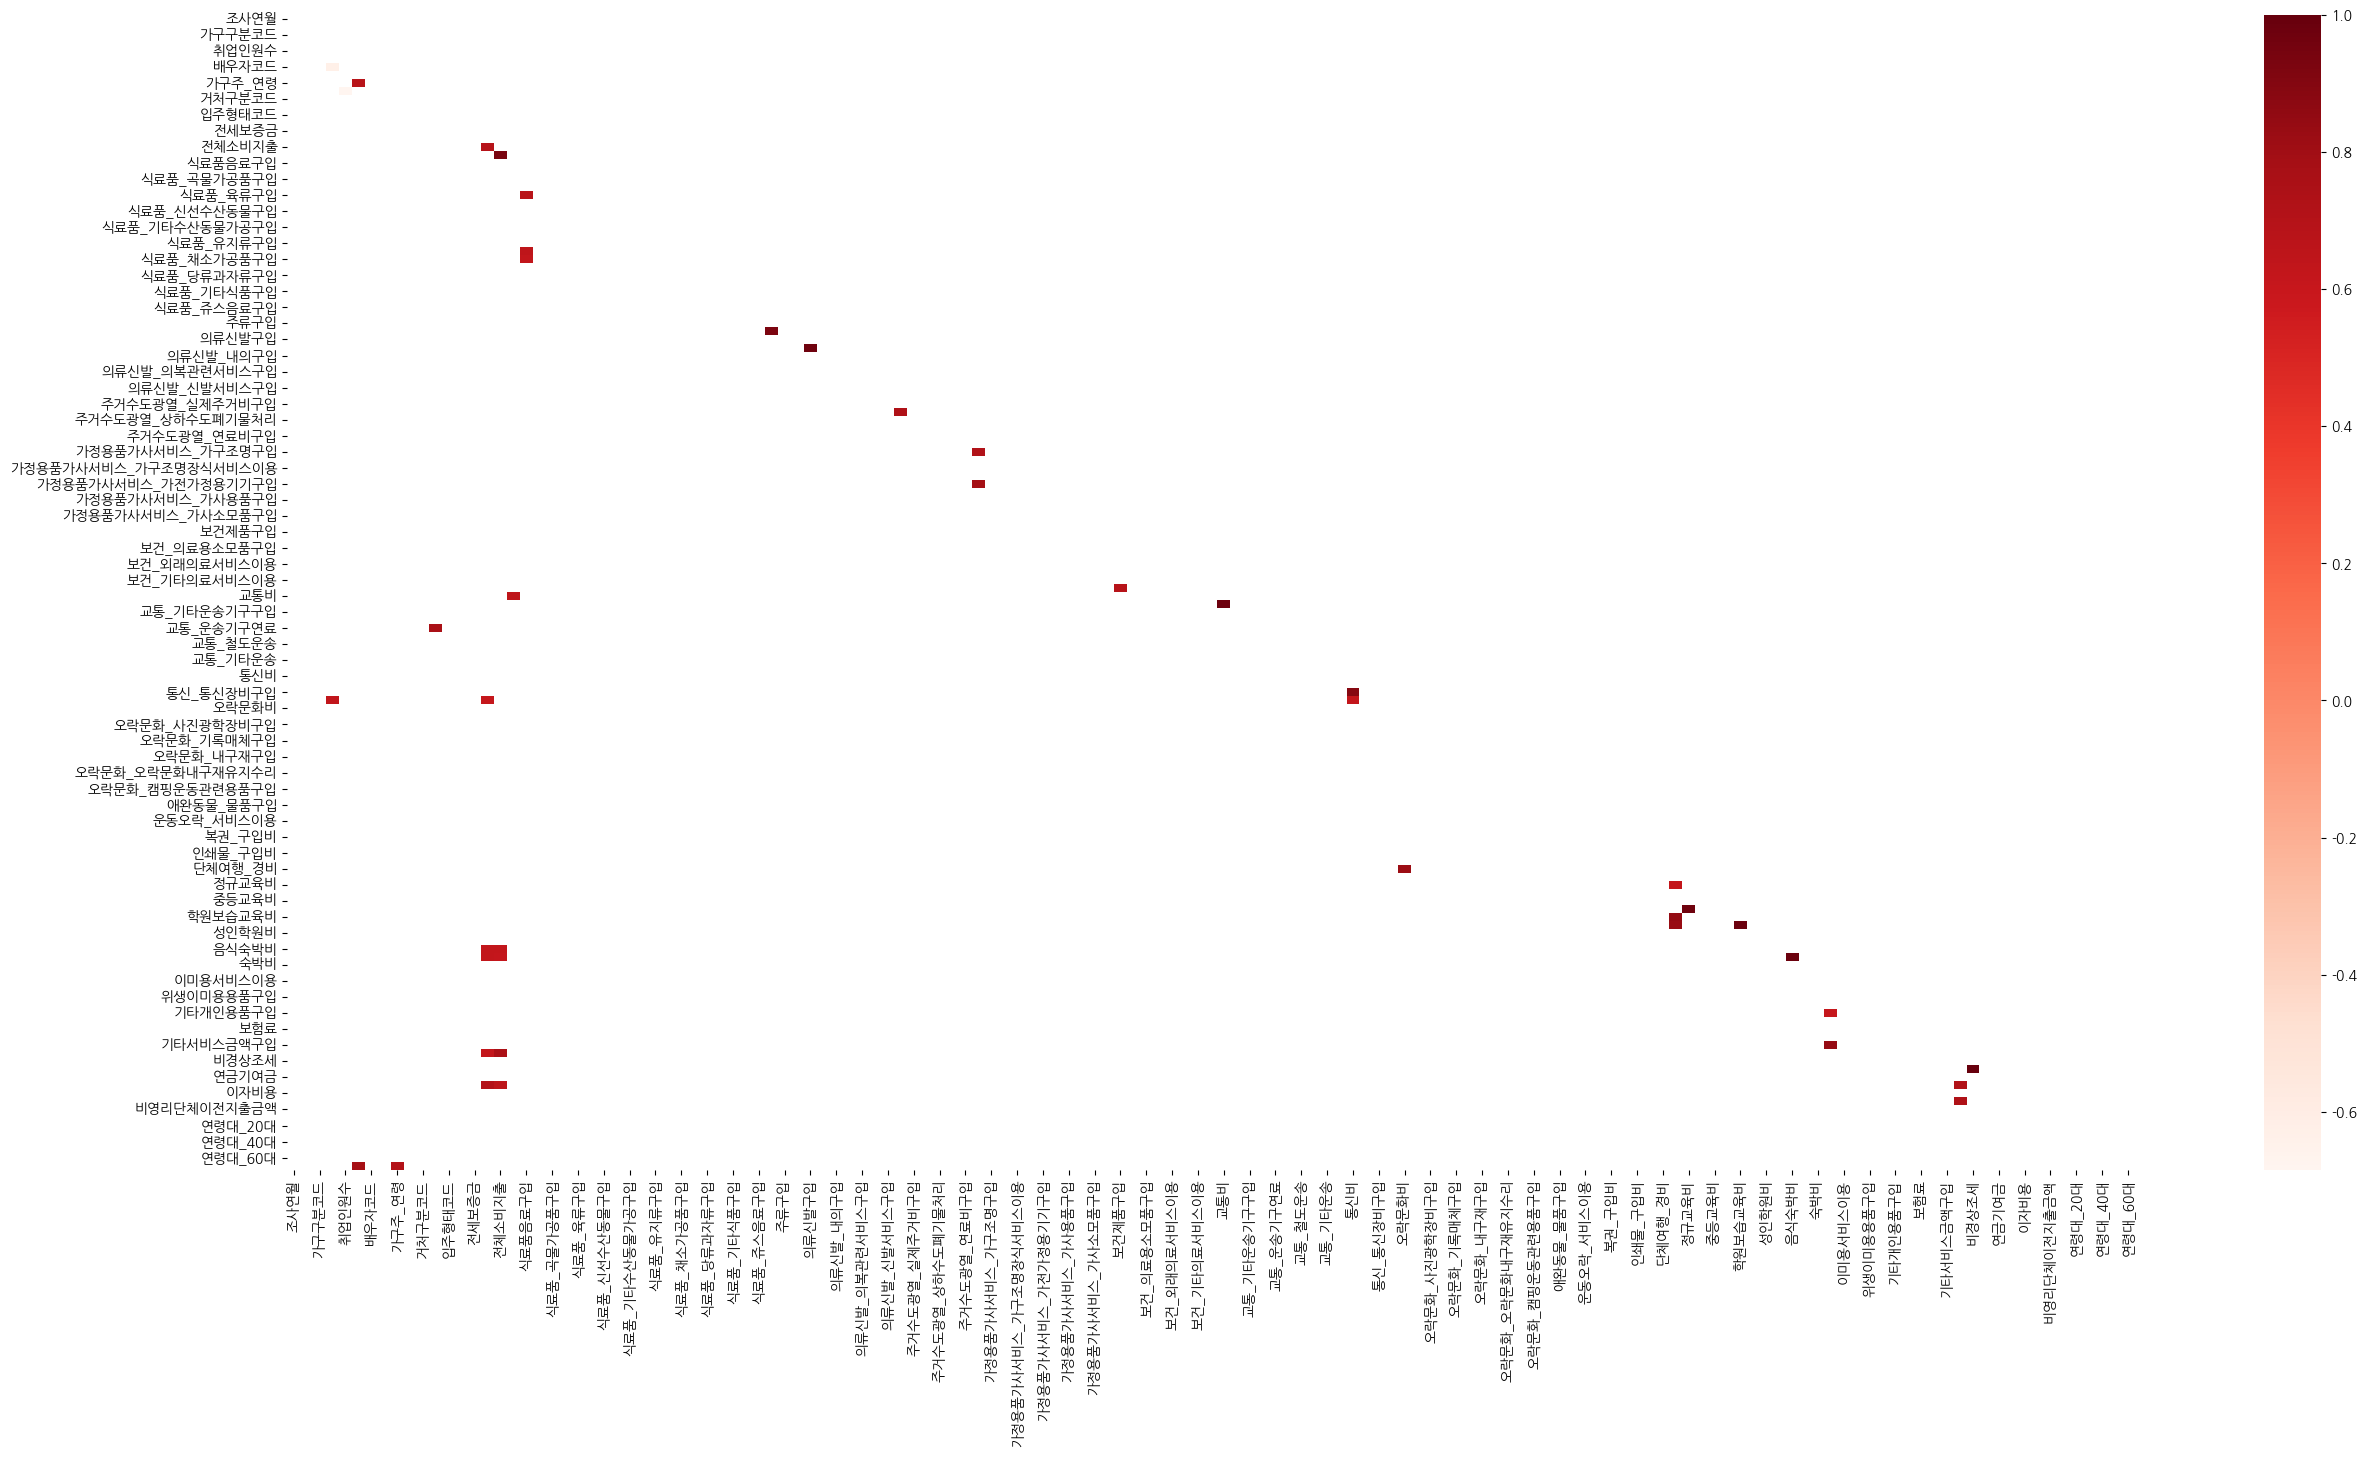

In [18]:
# 상관관계 0.6인 변수들 출력

plt.figure(figsize=(30, 15))
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
strong_correlation = (data.corr() >= 0.6) | (data.corr() <= -0.6)
sns.heatmap(data.corr()[strong_correlation], annot=True, mask=mask, fmt='0.2f', cmap='Reds')
plt.show()


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


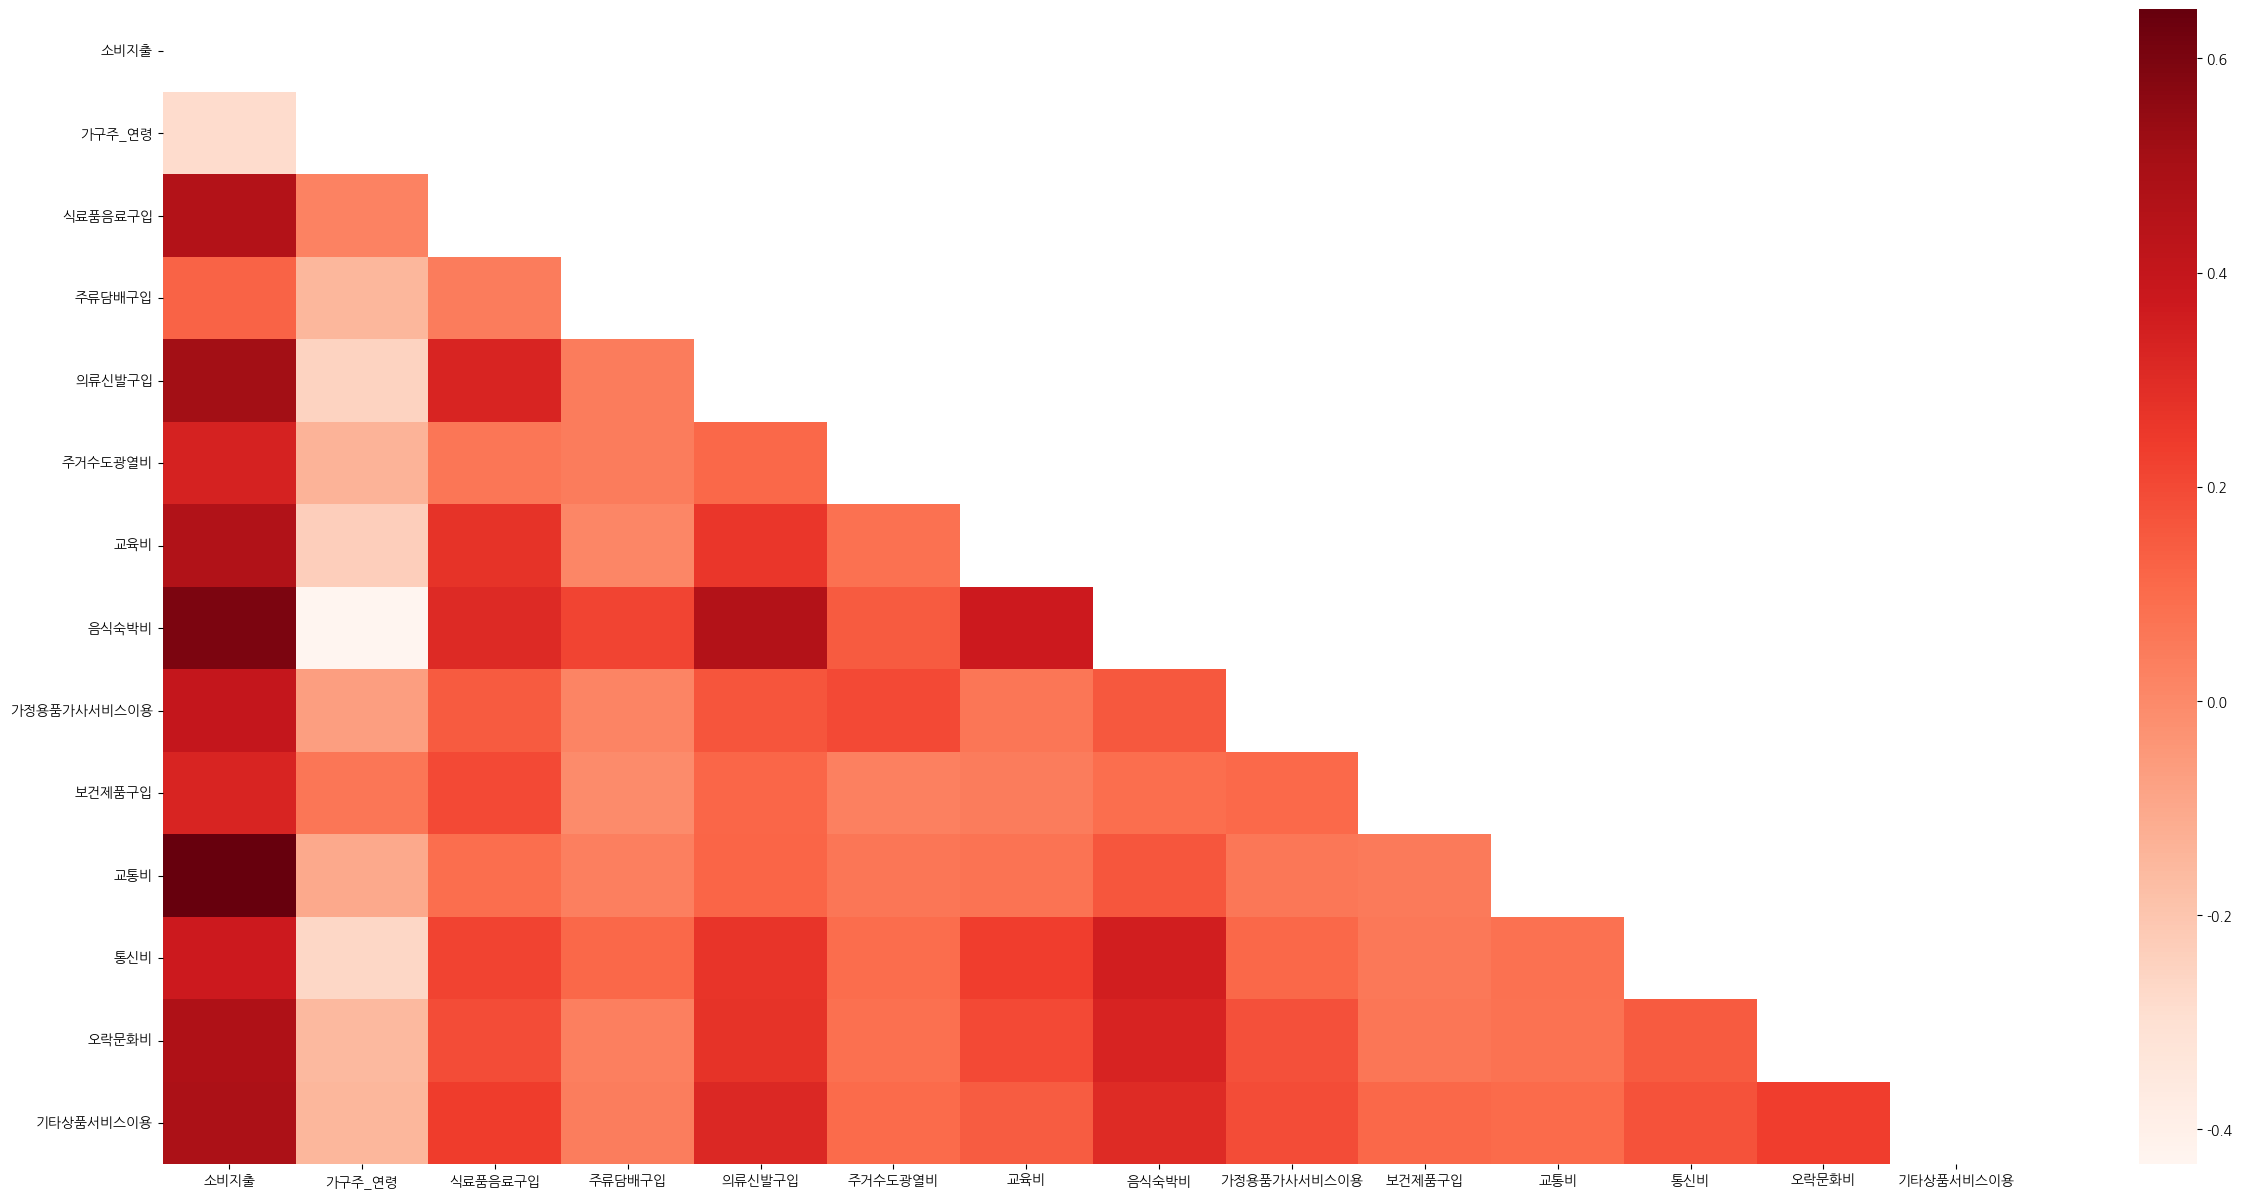

In [19]:
plt.figure(figsize=(30,15))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), annot=True, fmt='0.2f', mask=mask, cmap='Reds')
plt.show()

* 전체소비지출 = 식대 소득구간코드 사회보장구입비 음식숙박비
* 소비지출 = 교통비 음식숙박비 교통_자동차구입

상관관계

* 소비지출-교통비 (0.65)
* 소비지출-음식숙박비 (0.60)
* 소비지출-의류신발구입 (0.51)
* 소비지출-기타상품서비스이용 (0.48)
* 소비지출-오락문화비 (0.47)
* 소비지출-식료품음료구입 (0.46)
* 소비지출-교육비 (0.46)
* 소비지출-가정용품가사서비스비용 (0.40)

In [20]:
data.head(2)

,조사연월,가구일련번호,가구구분코드,가구원수,취업인원수,노인가구여부,배우자코드,가구주_성별코드,가구주_연령,가구주_취업여부,...,이자비용,가구간이전지출금액,비영리단체이전지출금액,도시읍면부구분코드,연령대_20대,연령대_30대,연령대_40대,연령대_50대,연령대_60대,연령대_70대 이상
0,201900,1,2,1,0,0,2,2,64,2,...,4893,50000,29333,1,False,False,False,False,True,False
1,201900,2,1,3,2,0,1,1,63,1,...,0,142500,26000,1,False,False,False,False,True,False


In [22]:
def age(가구주_연령):
    if 가구주_연령 < 20:
        return None  # 10대는 None으로 처리하여 제외
    elif 20 <= 가구주_연령 < 30:
        return '20대'
    elif 30 <= 가구주_연령 < 40:
        return '30대'
    elif 40 <= 가구주_연령 < 50:
        return '40대'
    elif 50 <= 가구주_연령 < 60:
        return '50대'
    elif 60 <= 가구주_연령 < 70:
        return '60대'
    else:
        return '70대 이상'

# 데이터 연령대별 구분
data.loc[:, '연령대'] = data['가구주_연령'].apply(age)
data = data.dropna()  # None 값을 가진 행 제외
data.연령대

0          60대
1          60대
2          50대
3          20대
4          50대
         ...  
9505       30대
9506       50대
9507       60대
9508       60대
9509    70대 이상
Name: 연령대, Length: 9492, dtype: object

1인가구 소비

In [24]:
single_expend = data[data['가구원수']==1][["소비지출", "식대", "소득구간코드", "의류신발구입", "사회보장구입비", "음식숙박비", "교통비"]]
single_expend.head(2)


,소비지출,식대,소득구간코드,의류신발구입,사회보장구입비,음식숙박비,교통비
0,451464,40642,1,21833,0,40642,31550
2,1358773,108943,1,86571,3728,108943,34700


#변수 설명폼
* sex 남:0, 여:1
* age : 나이
* marri_1 : 미혼 : 0, 기혼 : 1
* EC_wht_23 : 주당 평균 근로시간
* DF2_pr : 우울 x : 0, 우울 o : 1

* 회귀분석을적용할수있는모델구축
* 분류모형을적용할수있는모델구축

In [25]:
## [전처리]

import pandas as pd

# 행의 개수 반환
nrow = single_expend.shape[0]
print(nrow)

# 결측치가 있는지 여부 확인
missingvalue = single_expend.isna().sum().sum() > 0

# 결과 출력 FALSE 출력시 결측치 없음을 의미함.
print(missingvalue)

# 2827개의 데이터 사용

2810
False


In [26]:
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable


In [27]:
# 1) 교통비,이 주어졌을 때, 소비지출을 예측하는 모델(회귀분석)을 만들어보자.
from sklearn.linear_model import LinearRegression

선형 회귀모형

In [28]:
# 회귀분석 모델 생성
lm = LinearRegression()

# 독립변수(x)와 종속변수(y) 설정

x = single_expend[["음식숙박비", "교통비", "의류신발구입"]]

y = single_expend['소비지출']

# 모델 학습
lm.fit(x, y)

# 회귀계수 출력
print("회귀계수:", lm.coef_)
print("절편:", lm.intercept_)


회귀계수: [1.78151262 1.04335633 2.11375516]
절편: 653182.1950451066


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
# 회귀식 생성
regression_equation = "소비지출 = {:.2f}".format(lm.intercept_)
for i, coef in enumerate(lm.coef_):
    regression_equation += " + {:.2f} * {}".format(coef, x.columns[i])

print("회귀모형:")
print(regression_equation)


회귀모형:
소비지출 = 653182.20 + 1.78 * 음식숙박비 + 1.04 * 교통비 + 2.11 * 의류신발구입


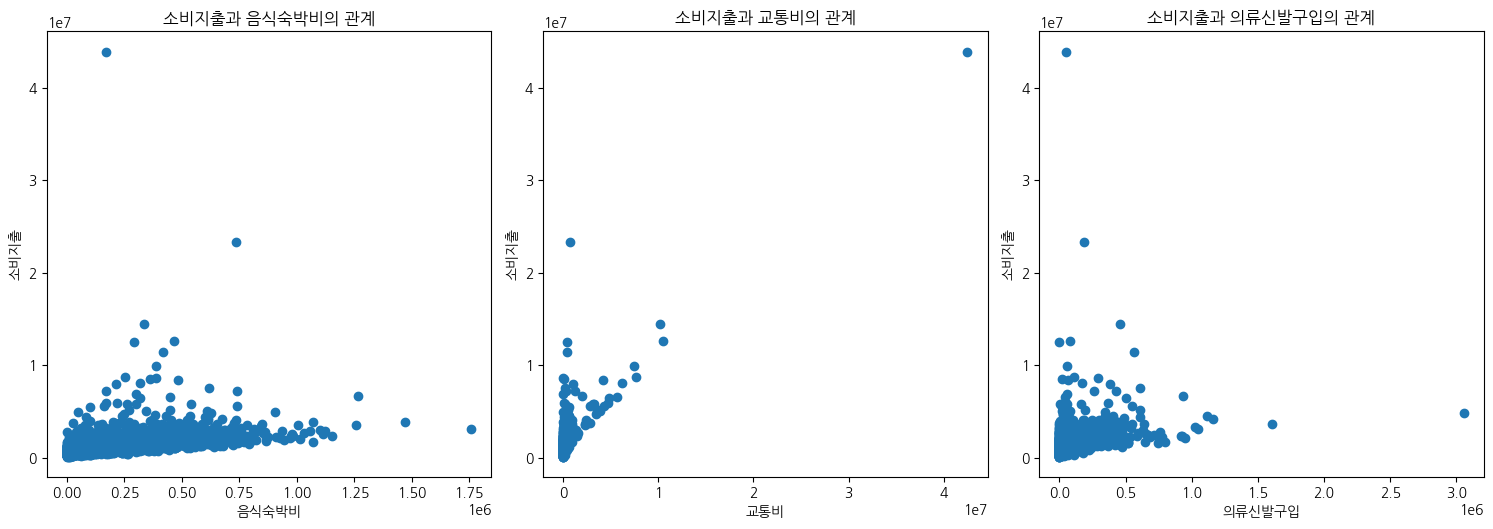

In [31]:
import matplotlib.pyplot as plt

# Reshape y to a 1D array
y = y.values.reshape(-1)

# 그래프의 전체 사이즈 설정
plt.figure(figsize=(20, 10))

# 각 독립변수에 대한 scatter plot을 그리기
for i, col in enumerate(x.columns, 1):
    plt.subplot(2, 4, i)
    plt.scatter(x[col], y)
    plt.xlabel(col)
    plt.ylabel('소비지출')
    plt.title('소비지출과 ' + col + '의 관계')

# 그래프 출력
plt.tight_layout()
plt.show()



In [32]:
!pip install statsmodels


Defaulting to user installation because normal site-packages is not writeable


In [33]:
import statsmodels.api as sm
results = sm.OLS(y, sm.add_constant(x)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     2314.
Date:                Tue, 07 May 2024   Prob (F-statistic):               0.00
Time:                        18:26:52   Log-Likelihood:                -41910.
No. Observations:                2810   AIC:                         8.383e+04
Df Residuals:                    2806   BIC:                         8.385e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.532e+05   1.94e+04     33.674      0.000    6.15e+05    6.91e+05
음식숙박비          1.7815      0.073     24.469      0.000       1.639       1.924
교통비            1.0434      0.015     70.188      0.000       1.014       1.073
의류신발구입         2.1138      0.115     18.428      0.000       1.889       2.339
==============================================================================
Omnibus:                     4781.949   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7379639.241
Skew:                          11.225   Prob(JB):                         0.00
Kurtosis:                     253.050   Cond. No.                     1.34e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 회귀분석 함수로 적용

1인가구 소비 회귀분석
- R-squared: 0.792

행의 개수: 389
결측치 존재 여부: False
회귀계수: [1.01066428 0.95297772 1.78302081 2.34777913 5.90051334 1.42779308
 2.00426197]
절편: 363121.6038593601
회귀모형:
소비지출 = 363121.60 + 1.01 * 교통비 + 0.95 * 주거수도광열_실제주거비구입 + 1.78 * 음식숙박비 + 2.35 * 보험료 + 5.90 * 식료품_육류구입 + 1.43 * 보건_외래의료서비스이용 + 2.00 * 가정용품가사서비스_가전가정용기기구입


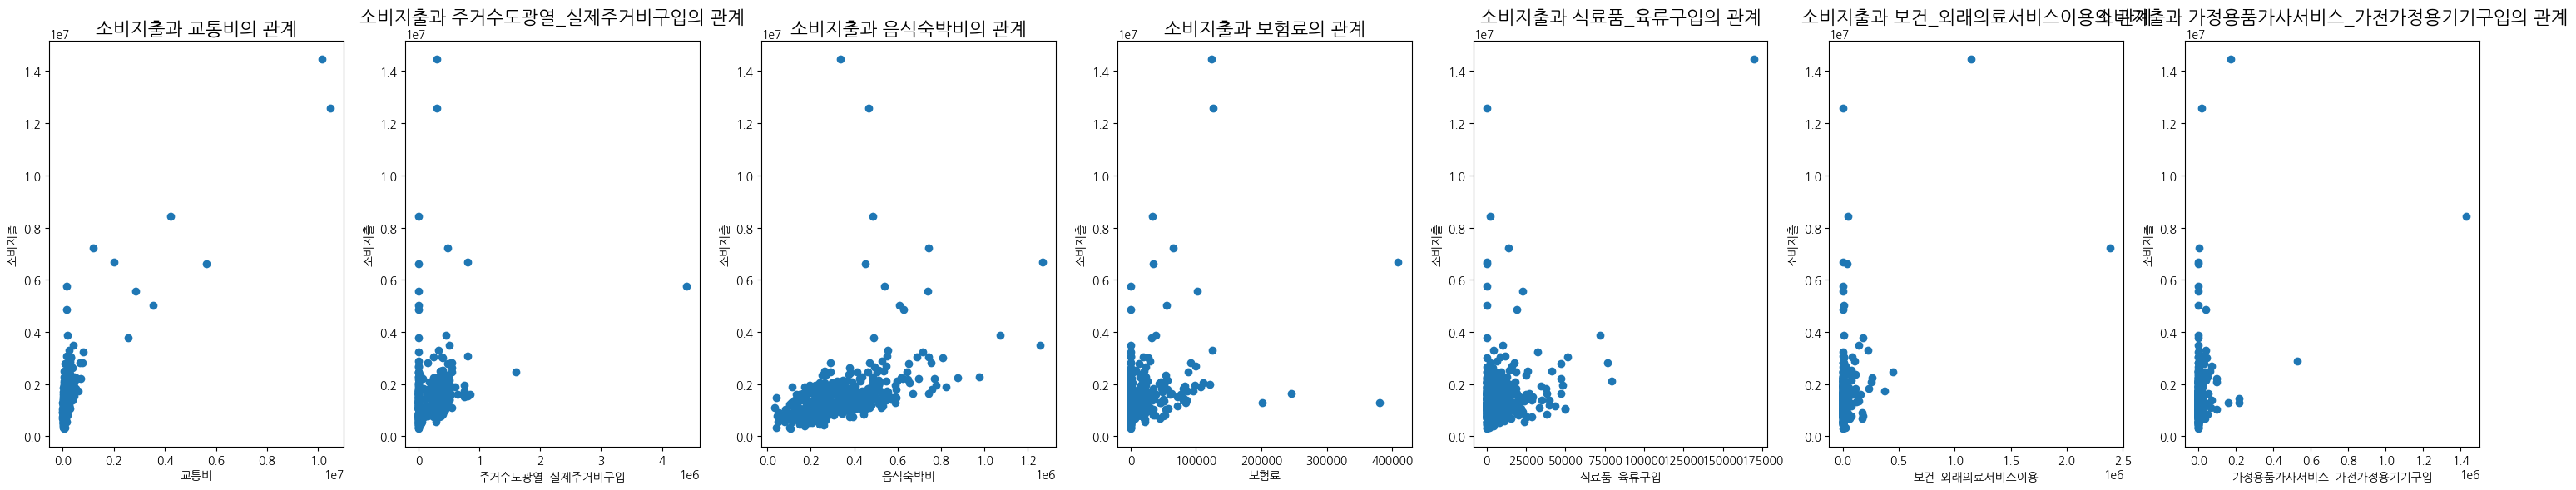

                            OLS Regression Results                            
Dep. Variable:                   소비지출   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     595.1
Date:                Tue, 07 May 2024   Prob (F-statistic):          9.35e-201
Time:                        22:20:17   Log-Likelihood:                -5533.2
No. Observations:                 389   AIC:                         1.108e+04
Df Residuals:                     381   BIC:                         1.111e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.631e+05    

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

def analyze_expenditure(df, columns):
    # 데이터프레임에서 지정된 컬럼만 선택
    selected_data = df[columns]

    # 행의 개수 반환
    nrow = selected_data.shape[0]
    print(f"행의 개수: {nrow}")

    # 결측치가 있는지 여부 확인
    missingvalue = selected_data.isna().sum().sum() > 0
    # 결과 출력
    print("결측치 존재 여부:", missingvalue)

    # 회귀분석 모델 생성
    lm = LinearRegression()
    # 독립변수(x)와 종속변수(y) 설정
    x = selected_data[columns[1:]] # 첫 번째 컬럼을 제외한 나머지 컬럼
    y = selected_data[columns[0]] # 첫 번째 컬럼이 종속변수

    # 모델 학습
    lm.fit(x, y)

    # 회귀계수와 절편 출력
    print("회귀계수:", lm.coef_)
    print("절편:", lm.intercept_)

    # 회귀식 생성
    regression_equation = f"{columns[0]} = {lm.intercept_:.2f}"
    for i, coef in enumerate(lm.coef_):
        regression_equation += f" + {coef:.2f} * {columns[i+1]}"
    
    print("회귀모형:")
    print(regression_equation)

    # 그래프의 전체 사이즈 설정
    plt.figure(figsize=(30, 6))
    # 각 독립변수에 대한 scatter plot을 그리기
    for i, col in enumerate(x.columns):
        plt.subplot(1, len(x.columns), i+1)
        plt.scatter(x[col], y)
        plt.xlabel(col)
        plt.ylabel(columns[0])
        plt.title(f'{columns[0]}과 {col}의 관계',size = 16)

    # 그래프 출력
    plt.tight_layout()
    plt.show()
    
    # statsmodels를 사용한 회귀 분석
    x_with_const = sm.add_constant(x) # 상수항 추가
    model = sm.OLS(y, x_with_const).fit() # 모델 학습
    print(model.summary()) # 회귀 분석 결과 요약 출력

analyze_expenditure(data[(data['가구원수'] == 1) & (data['연령대'] == '20대')], ["소비지출", '교통비','주거수도광열_실제주거비구입', '음식숙박비','보험료', 
                                              '식료품_육류구입', '보건_외래의료서비스이용','가정용품가사서비스_가전가정용기기구입'])

1인가구 성별 회귀분석
- 남성 : 0.827
- 여성 : 0.707

C:\Users\rladn\AppData\Local\Temp\ipykernel_16340\254704774.py:59: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  analyze_expenditure(data[(data['가구원수'] == 1) & (gender == '여성')], ["소비지출", '교통비','주거수도광열_실제주거비구입', '음식숙박비','보험료',


행의 개수: 1607
결측치 존재 여부: False
회귀계수: [1.11001451 0.88569383 2.41671388 2.13622522 4.57643606 1.26360298
 2.26552063]
절편: 374947.057110457
회귀모형:
소비지출 = 374947.06 + 1.11 * 교통비 + 0.89 * 주거수도광열_실제주거비구입 + 2.42 * 음식숙박비 + 2.14 * 보험료 + 4.58 * 식료품_육류구입 + 1.26 * 보건_외래의료서비스이용 + 2.27 * 가정용품가사서비스_가전가정용기기구입


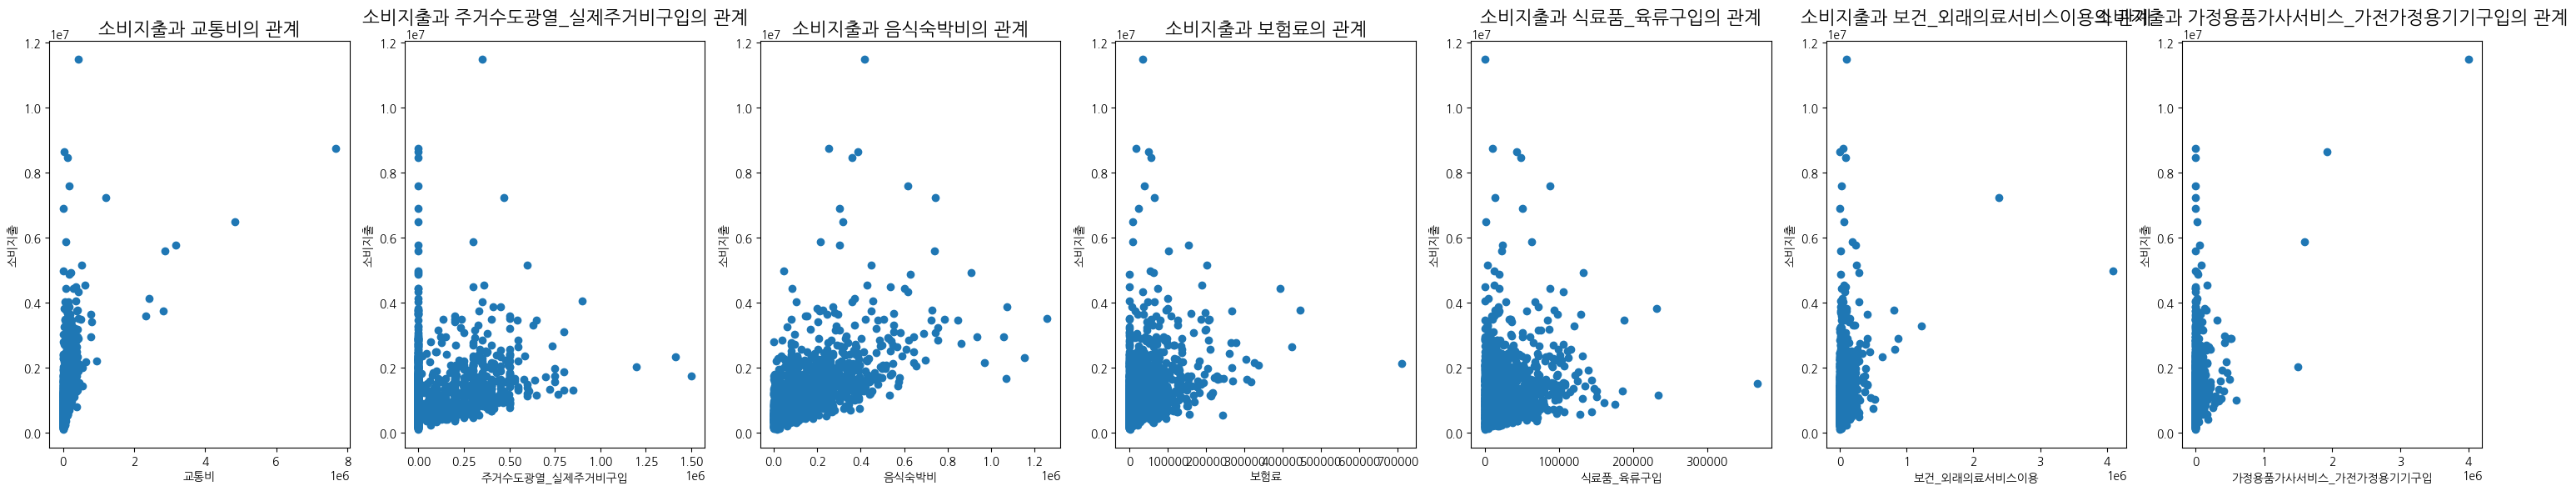

                            OLS Regression Results                            
Dep. Variable:                   소비지출   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     552.1
Date:                Tue, 07 May 2024   Prob (F-statistic):               0.00
Time:                        22:21:03   Log-Likelihood:                -23357.
No. Observations:                1607   AIC:                         4.673e+04
Df Residuals:                    1599   BIC:                         4.677e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.749e+05   2

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

def analyze_expenditure(df, columns):
    # 데이터프레임에서 지정된 컬럼만 선택
    selected_data = df[columns]

    # 행의 개수 반환
    nrow = selected_data.shape[0]
    print(f"행의 개수: {nrow}")

    # 결측치가 있는지 여부 확인
    missingvalue = selected_data.isna().sum().sum() > 0
    # 결과 출력
    print("결측치 존재 여부:", missingvalue)

    # 회귀분석 모델 생성
    lm = LinearRegression()
    # 독립변수(x)와 종속변수(y) 설정
    x = selected_data[columns[1:]] # 첫 번째 컬럼을 제외한 나머지 컬럼
    y = selected_data[columns[0]] # 첫 번째 컬럼이 종속변수

    # 모델 학습
    lm.fit(x, y)

    # 회귀계수와 절편 출력
    print("회귀계수:", lm.coef_)
    print("절편:", lm.intercept_)

    # 회귀식 생성
    regression_equation = f"{columns[0]} = {lm.intercept_:.2f}"
    for i, coef in enumerate(lm.coef_):
        regression_equation += f" + {coef:.2f} * {columns[i+1]}"
    
    print("회귀모형:")
    print(regression_equation)

    # 그래프의 전체 사이즈 설정
    plt.figure(figsize=(30, 6))
    # 각 독립변수에 대한 scatter plot을 그리기
    for i, col in enumerate(x.columns):
        plt.subplot(1, len(x.columns), i+1)
        plt.scatter(x[col], y)
        plt.xlabel(col)
        plt.ylabel(columns[0])
        plt.title(f'{columns[0]}과 {col}의 관계',size = 16)

    # 그래프 출력
    plt.tight_layout()
    plt.show()
    
    # statsmodels를 사용한 회귀 분석
    x_with_const = sm.add_constant(x) # 상수항 추가
    model = sm.OLS(y, x_with_const).fit() # 모델 학습
    print(model.summary()) # 회귀 분석 결과 요약 출력

analyze_expenditure(data[(data['가구원수'] == 1) & (gender == '여성')], ["소비지출", '교통비','주거수도광열_실제주거비구입', '음식숙박비','보험료', 
                                              '식료품_육류구입', '보건_외래의료서비스이용','가정용품가사서비스_가전가정용기기구입'])

1인가구 남성 연령별 회귀분석
- 20대 : 0.935
- 30대 : 0.690
- 40대 : 0.829
- 50대 : 0.862
- 60대 : 0.623
- 70대 이상: 0.664

C:\Users\rladn\AppData\Local\Temp\ipykernel_16340\3365582950.py:59: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  analyze_expenditure(data[(data['가구원수'] == 1) & (gender == '남성') & (data['연령대'] == '20대')], ["소비지출", '교통비','주거수도광열_실제주거비구입',


행의 개수: 220
결측치 존재 여부: False
회귀계수: [1.04348896 1.02149222 1.48745113 1.87635941 6.26389539 0.8850616
 1.94046874]
절편: 377708.4987443646
회귀모형:
소비지출 = 377708.50 + 1.04 * 교통비 + 1.02 * 주거수도광열_실제주거비구입 + 1.49 * 음식숙박비 + 1.88 * 보험료 + 6.26 * 식료품_육류구입 + 0.89 * 보건_외래의료서비스이용 + 1.94 * 가정용품가사서비스_가전가정용기기구입


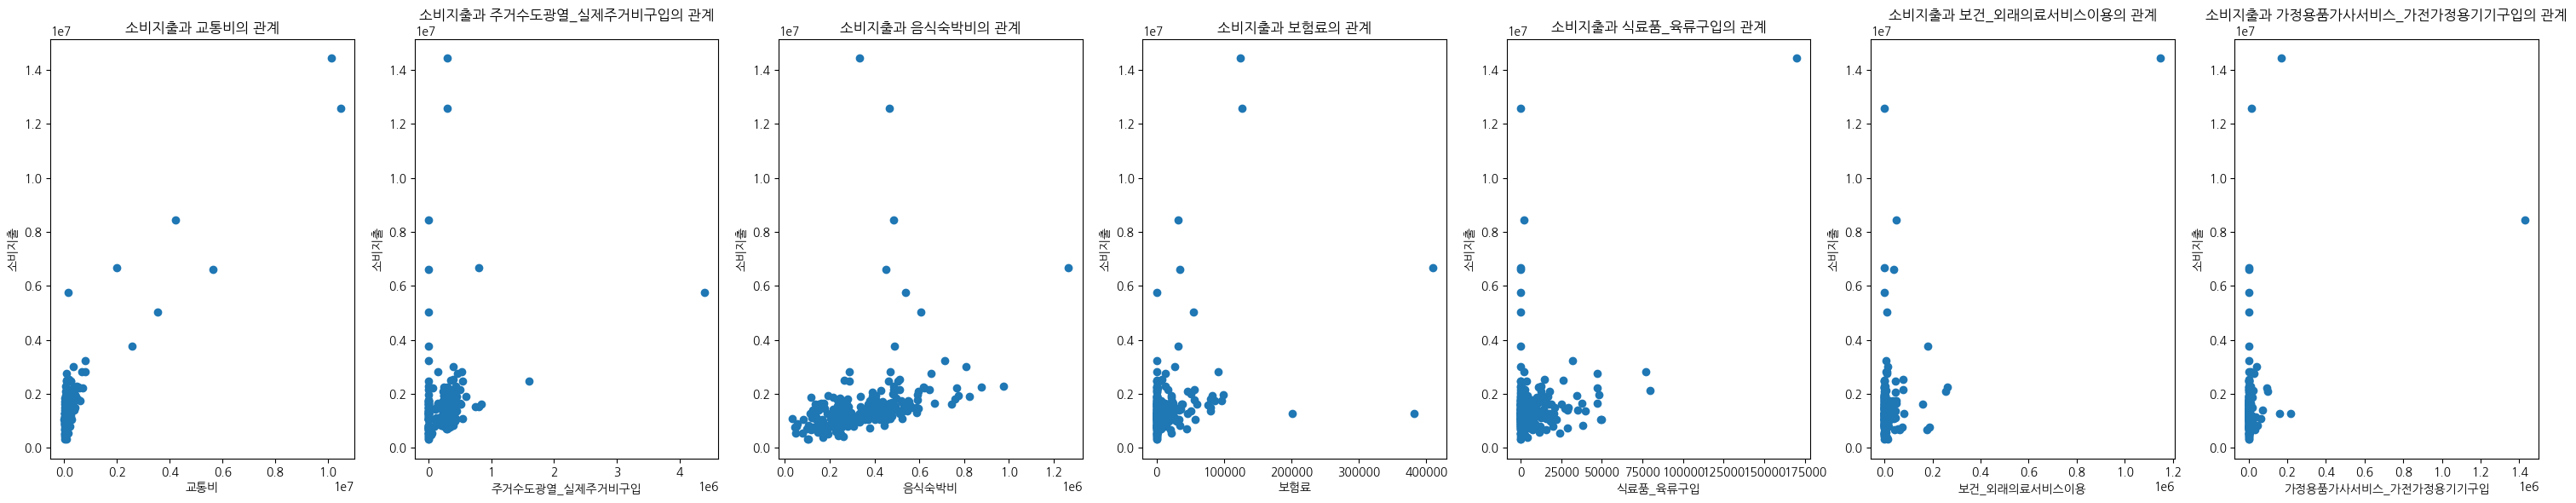

                            OLS Regression Results                            
Dep. Variable:                   소비지출   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     694.0
Date:                Tue, 07 May 2024   Prob (F-statistic):          2.37e-142
Time:                        22:21:45   Log-Likelihood:                -3089.8
No. Observations:                 220   AIC:                             6196.
Df Residuals:                     212   BIC:                             6223.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.777e+05   4

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

def analyze_expenditure(df, columns):
    # 데이터프레임에서 지정된 컬럼만 선택
    selected_data = df[columns]

    # 행의 개수 반환
    nrow = selected_data.shape[0]
    print(f"행의 개수: {nrow}")

    # 결측치가 있는지 여부 확인
    missingvalue = selected_data.isna().sum().sum() > 0
    # 결과 출력
    print("결측치 존재 여부:", missingvalue)

    # 회귀분석 모델 생성
    lm = LinearRegression()
    # 독립변수(x)와 종속변수(y) 설정
    x = selected_data[columns[1:]] # 첫 번째 컬럼을 제외한 나머지 컬럼
    y = selected_data[columns[0]] # 첫 번째 컬럼이 종속변수

    # 모델 학습
    lm.fit(x, y)

    # 회귀계수와 절편 출력
    print("회귀계수:", lm.coef_)
    print("절편:", lm.intercept_)

    # 회귀식 생성
    regression_equation = f"{columns[0]} = {lm.intercept_:.2f}"
    for i, coef in enumerate(lm.coef_):
        regression_equation += f" + {coef:.2f} * {columns[i+1]}"
    
    print("회귀모형:")
    print(regression_equation)

    # 그래프의 전체 사이즈 설정
    plt.figure(figsize=(30, 6))
    # 각 독립변수에 대한 scatter plot을 그리기
    for i, col in enumerate(x.columns):
        plt.subplot(1, len(x.columns), i+1)
        plt.scatter(x[col], y)
        plt.xlabel(col)
        plt.ylabel(columns[0])
        plt.title(f'{columns[0]}과 {col}의 관계')

    # 그래프 출력
    plt.tight_layout()
    plt.show()
    
    # statsmodels를 사용한 회귀 분석
    x_with_const = sm.add_constant(x) # 상수항 추가
    model = sm.OLS(y, x_with_const).fit() # 모델 학습
    print(model.summary()) # 회귀 분석 결과 요약 출력

analyze_expenditure(data[(data['가구원수'] == 1) & (gender == '남성') & (data['연령대'] == '20대')], ["소비지출", '교통비','주거수도광열_실제주거비구입', 
                                                                                            '음식숙박비','보험료', '식료품_육류구입', '보건_외래의료서비스이용',
                                                                                            '가정용품가사서비스_가전가정용기기구입'])

1인가구 여성 연령별 회귀분석
- 20대 : 0.809
- 30대 : 0.837
- 40대 : 0.786
- 50대 : 0.678
- 60대 : 0.435
- 70대 이상: 0.483

행의 개수: 657
결측치 존재 여부: False
회귀계수: [0.98472614 0.98460848 2.15534581 3.01270336 3.21213772 1.12606578
 1.15808707]
절편: 402883.9498277431
회귀모형:
소비지출 = 402883.95 + 0.98 * 교통비 + 0.98 * 주거수도광열_실제주거비구입 + 2.16 * 음식숙박비 + 3.01 * 보험료 + 3.21 * 식료품_육류구입 + 1.13 * 보건_외래의료서비스이용 + 1.16 * 가정용품가사서비스_가전가정용기기구입


C:\Users\rladn\AppData\Local\Temp\ipykernel_16340\1279748855.py:59: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  analyze_expenditure(data[(data['가구원수'] == 1) & (gender == '여성') & (data['연령대'] == '70대 이상')], ["소비지출", '교통비','주거수도광열_실제주거비구입', '음식숙박비','보험료', '식료품_육류구입', '보건_외래의료서비스이용','가정용품가사서비스_가전가정용기기구입'])


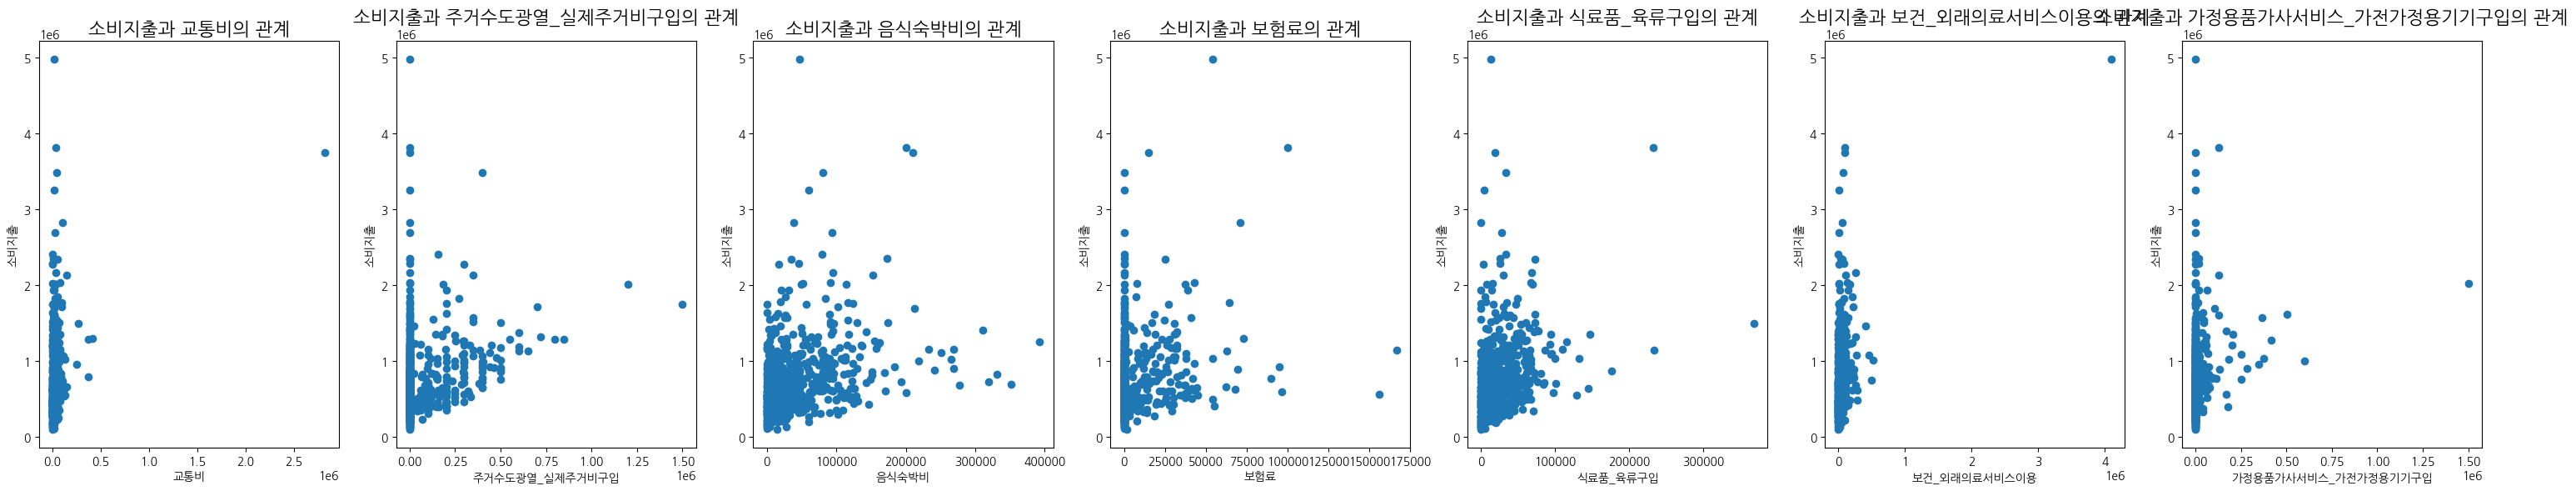

                            OLS Regression Results                            
Dep. Variable:                   소비지출   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     86.72
Date:                Tue, 07 May 2024   Prob (F-statistic):           8.33e-89
Time:                        18:26:57   Log-Likelihood:                -9328.2
No. Observations:                 657   AIC:                         1.867e+04
Df Residuals:                     649   BIC:                         1.871e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.029e+05   2

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

def analyze_expenditure(df, columns):
    # 데이터프레임에서 지정된 컬럼만 선택
    selected_data = df[columns]

    # 행의 개수 반환
    nrow = selected_data.shape[0]
    print(f"행의 개수: {nrow}")

    # 결측치가 있는지 여부 확인
    missingvalue = selected_data.isna().sum().sum() > 0
    # 결과 출력
    print("결측치 존재 여부:", missingvalue)

    # 회귀분석 모델 생성
    lm = LinearRegression()
    # 독립변수(x)와 종속변수(y) 설정
    x = selected_data[columns[1:]] # 첫 번째 컬럼을 제외한 나머지 컬럼
    y = selected_data[columns[0]] # 첫 번째 컬럼이 종속변수

    # 모델 학습
    lm.fit(x, y)

    # 회귀계수와 절편 출력
    print("회귀계수:", lm.coef_)
    print("절편:", lm.intercept_)

    # 회귀식 생성
    regression_equation = f"{columns[0]} = {lm.intercept_:.2f}"
    for i, coef in enumerate(lm.coef_):
        regression_equation += f" + {coef:.2f} * {columns[i+1]}"
    
    print("회귀모형:")
    print(regression_equation)

    # 그래프의 전체 사이즈 설정
    plt.figure(figsize=(30, 6))
    # 각 독립변수에 대한 scatter plot을 그리기
    for i, col in enumerate(x.columns):
        plt.subplot(1, len(x.columns), i+1)
        plt.scatter(x[col], y)
        plt.xlabel(col)
        plt.ylabel(columns[0])
        plt.title(f'{columns[0]}과 {col}의 관계',size = 16)

    # 그래프 출력
    plt.tight_layout()
    plt.show()
    
    # statsmodels를 사용한 회귀 분석
    x_with_const = sm.add_constant(x) # 상수항 추가
    model = sm.OLS(y, x_with_const).fit() # 모델 학습
    print(model.summary()) # 회귀 분석 결과 요약 출력

analyze_expenditure(data[(data['가구원수'] == 1) & (gender == '여성') & (data['연령대'] == '70대 이상')], ["소비지출", '교통비','주거수도광열_실제주거비구입', '음식숙박비','보험료', '식료품_육류구입', '보건_외래의료서비스이용','가정용품가사서비스_가전가정용기기구입'])